# <span style="color:crimson">TIDYRAINBOW DATA</span>
<span style="color:dodgerblue">**2024 Tidytuesday  Week 25** </span>

## Setup

### Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Data

In [5]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-06-25/lgbtq_movies.csv"
dfr = pd.read_csv(url)

## EDA

### Overview

In [6]:
dfr.shape

(7165, 12)

In [7]:
dfr.columns

Index(['id', 'title', 'original_title', 'original_language', 'overview',
       'release_date', 'popularity', 'vote_average', 'vote_count', 'adult',
       'video', 'genre_ids'],
      dtype='object')

In [8]:
dfr.head(4)

,id,title,original_title,original_language,overview,release_date,popularity,vote_average,vote_count,adult,video,genre_ids
0,860159,Crush,Crush,en,When an aspiring young artist is forced to joi...,2022-04-29,321.755,7.5,120,False,False,"[35, 10749]"
1,719088,"Yes, No, or Maybe Half?",イエスかノーか半分か,ja,"Kunieda Kei is a popular, young TV announcer w...",2020-12-11,139.229,7.1,26,False,False,"[16, 18, 10749]"
2,632632,Given,映画 ギヴン,ja,The film centers on the love relationship amon...,2020-08-22,110.140,8.4,318,False,False,"[16, 18, 10402, 10749]"
3,929477,Heart Shot,Heart Shot,en,Teenagers Nikki and Sam are in love and planni...,2022-02-17,88.760,5.4,37,False,False,"[10749, 80]"


In [9]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7165 non-null   int64  
 1   title              7165 non-null   object 
 2   original_title     7165 non-null   object 
 3   original_language  7165 non-null   object 
 4   overview           7088 non-null   object 
 5   release_date       7075 non-null   object 
 6   popularity         7165 non-null   float64
 7   vote_average       7165 non-null   float64
 8   vote_count         7165 non-null   int64  
 9   adult              7165 non-null   bool   
 10  video              7165 non-null   bool   
 11  genre_ids          7165 non-null   object 
dtypes: bool(2), float64(2), int64(2), object(6)
memory usage: 573.9+ KB


In [68]:
df1 = dfr[['id', 'release_date', 'popularity', 'vote_average', 'vote_count', 'adult']].copy()


In [69]:
df1.loc[:, 'date'] = pd.to_datetime(
    df1.loc[:, 'release_date'],
    format='%Y-%m-%d')

df1 = df1.drop(columns=['release_date'])


In [89]:

df = df1.loc[:, 'id':'date'].copy()
df['month'] = df['date'].dt.month_name()
df['month_abbr'] = df['date'].dt.strftime('%b')
df['year'] = df['date'].dt.year
df['decade'] = df['year'] // 10 * 10

In [90]:
df.head(2)

,id,popularity,vote_average,vote_count,adult,date,month,month_abbr,year,decade
0,860159,321.755,7.5,120,False,2022-04-29,April,Apr,2022.0,2020.0
1,719088,139.229,7.1,26,False,2020-12-11,December,Dec,2020.0,2020.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            7165 non-null   int64         
 1   popularity    7165 non-null   float64       
 2   vote_average  7165 non-null   float64       
 3   vote_count    7165 non-null   int64         
 4   adult         7165 non-null   bool          
 5   date          7075 non-null   datetime64[ns]
 6   month         7075 non-null   object        
 7   year          7075 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 399.0+ KB


In [48]:
df

,id,popularity,vote_average,vote_count,adult,date,month,month_abbr,year
0,860159,321.755,7.5,120,False,2022-04-29,April,Apr,2022.0
1,719088,139.229,7.1,26,False,2020-12-11,December,Dec,2020.0
2,632632,110.140,8.4,318,False,2020-08-22,August,Aug,2020.0
3,929477,88.760,5.4,37,False,2022-02-17,February,Feb,2022.0
4,197158,76.302,4.3,46,False,1981-01-01,January,Jan,1981.0
...,...,...,...,...,...,...,...,...,...
7160,37390,0.600,3.0,1,True,2010-02-17,February,Feb,2010.0
7161,983153,0.000,0.0,0,False,NaT,NaN,NaN,NaN
7162,983059,0.000,0.0,0,True,2001-01-01,January,Jan,2001.0
7163,983027,0.000,0.0,0,False,2022-06-05,June,Jun,2022.0


### By decade/ year / month

In [75]:

by_year_df = df.value_counts('year')

by_decade_df = df.value_counts('decade').sort_values()
by_decade_df.head()

decade
1880.0    1
1890.0    1
1900.0    2
1920.0    3
1940.0    3
Name: count, dtype: int64

In [50]:
by_month_df = df.value_counts('month_abbr')

new_order_fullname = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']

new_order_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

by_month_df = by_month_df.reindex(new_order_abbr, axis=0)

by_month_df.head(12)

month_abbr
Jan    938
Feb    510
Mar    587
Apr    527
May    557
Jun    726
Jul    499
Aug    492
Sep    607
Oct    656
Nov    558
Dec    418
Name: count, dtype: int64

## Viz

### By year / month

<Axes: title={'center': 'MOVIES RELEASED BY DECADE'}>

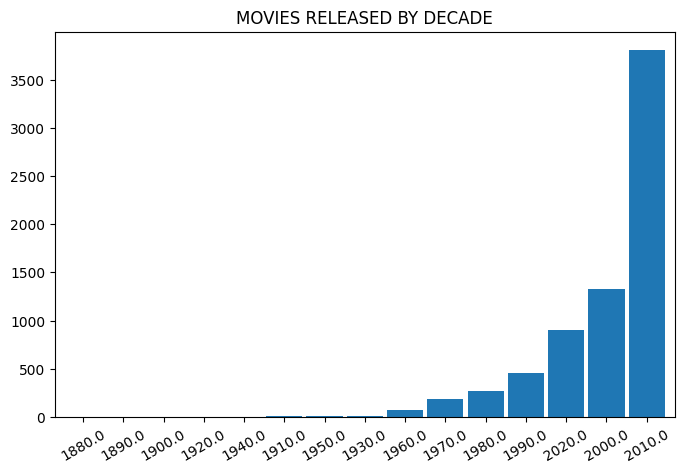

In [78]:
by_decade_df.plot(
    kind='bar', width = .9, figsize = (8, 5), rot=30,
    xlabel = '',
    title = 'MOVIES RELEASED BY DECADE')

<Axes: title={'center': 'MONTHLY MOVIES RELEASED'}>

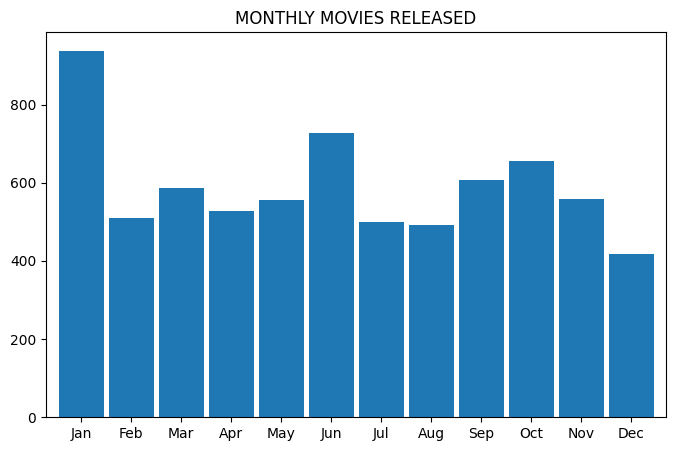

In [62]:
by_month_df.plot(
    kind='bar', width = .9, figsize = (8, 5), rot=0,
    xlabel = '',
    title = 'MONTHLY MOVIES RELEASED')